### Handwritten Digit recognition using SVM 

#### import useful package

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

%matplotlib inline

#### plot the data and create train and test set

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [24]:
X_train = mnist.train.images
Y_train = mnist.train.labels

X_test = mnist.test.images
Y_test = mnist.test.labels

print(X_train.shape, Y_train.shape)

m = 55000
tf.reset_default_graph()

(55000, 784) (55000, 10)


[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]


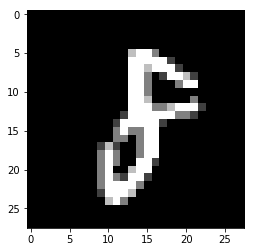

In [4]:
#plot the data
index = 30
image = X_train[30,:]

plt.imshow(image.reshape([28,28]), cmap = 'gray')
print(Y_train[30,:])

#### Create placeholder for input and output

In [26]:
X = tf.placeholder(tf.float32,shape = [55000,784], name = 'Input')
Y = tf.placeholder(tf.float32, shape = [55000,10], name = 'Output')

W = tf.Variable(tf.random_uniform([784,10], maxval = .0001, seed = 1 ), tf.float32, name = 'Weight')
b = tf.Variable(tf.random_uniform([1,1], maxval = .0001, seed = 1), tf.float32, name = 'bias')

#model of perceptron
Y_predict = tf.add(tf.matmul(X, W) , b)

In [27]:
l2_norm = tf.reduce_sum(tf.square(W))
alpha = tf.constant([0.01])
classification_term = tf.reduce_mean(tf.maximum(0.0, tf.subtract(1.0, tf.multiply(Y_predict, Y))))
loss = tf.add(classification_term , tf.multiply(alpha, l2_norm))

In [28]:
prediction = tf.sign(Y_predict)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, Y), tf.float32))

In [29]:
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)
init = tf.global_variables_initializer()


In [47]:
loss_vec = []
train_accuracy = []
test_accuracy = []

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(10):
        sess.run(train_step, {X: X_train, Y: Y_train})
        
    w_test = W.eval()
        

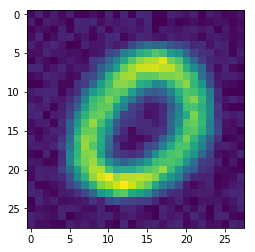

In [52]:
plt.imshow(w_test[:,0].reshape(28,28))


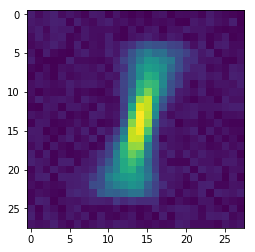

In [53]:
plt.imshow(w_test[:,1].reshape(28,28))

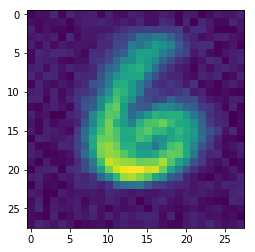

In [54]:
plt.imshow(w_test[:,6].reshape(28,28))

In [82]:
correct_no = 0
total_no = 0
for i in range(10000):
    y = np.dot(X_test[i,:] , w_test)
    
    if np.argmax(y) == np.argmax(Y_test[i,:]):
        correct_no += 1
    
    total_no += 1
print(correct_no / total_no)



0.6644


In [61]:
X_test.shape

(10000, 784)

In [83]:
print(y)

[ 0.07942168  0.04107872  0.0676539   0.05653219  0.05462488  0.05145413
  0.08004282  0.04679819  0.06165024  0.05359149]
